## **Tennis - Unmasking the Intangibles**

The ATP have for the last few seasons produced their [ATP Stats Leaderboards](https://www.atpworldtour.com/en/stats/leaderboard), providing some more advanced stats than were previously available to tennis fans. 

What I'm interested in investigating for this post is if these stats reveal attributes of this generations superstars (Federer, Nadal, Djokovic) that previously would be described by commentators as 'intangibles'.  

Specifically the data now allows us to see if a player saves break points against them at a better rate than they win points on their own serve generally.  This can show if these great players have an innate ability to elevate their game above their already stellar level at stressful moments in a match.

### **Methodology**

I could use a more repeatable method of data collection ([see earlier posts](https://eddiesport.github.io/analysis/sport/PGA-putting-analysis/)), but for variation I'm going to create a DataFrame from a dictionary of career stats for our 3 legendary players, then create a DataFrame from a CSV file I've created for our tour-wide sample.  All the data comes from the ATP Stats Leaderboards mentioned above (accurate as of 21/08/2018).

### **Legends Data - Creating a DataFrame from a Dictionary**

In [5]:
#Import relevant packages
import numpy as np
import pandas as pd

#Create our dictionary and DataFrame
serve_data = {'Roger Federer': [0.620, 0.773, 0.568, 0.671],
              'Rafael Nadal': [0.686, 0.718, 0.573, 0.666],
              'Novak Djokovic': [0.649, 0.733, 0.553, 0.654]}

serve_colnames = ['1st_Serve', '1st_Serve_Pts_Won', '2nd_Serve_Pts_Won', 'Break_Pts_Saved']

serve_df = pd.DataFrame.from_dict(serve_data, orient='index')
serve_df.columns = serve_colnames

#Create column for rate of points won on serve generally
#Maths: (1st Serve In * 1st Serve Win) + (2nd Serve In * 2nd Serve Win)
serve_df['Serve_Pts_Won'] = ((serve_df['1st_Serve'] * serve_df['1st_Serve_Pts_Won']) \
        + ((1 - serve_df['1st_Serve']) * serve_df['2nd_Serve_Pts_Won']))
#Create column for difference in performance between a point on serve and facing a break point on serve
serve_df['BP_Diff_%'] = (serve_df['Serve_Pts_Won'] - serve_df['Break_Pts_Saved']) * 100

print(serve_df)

                1st_Serve  1st_Serve_Pts_Won  2nd_Serve_Pts_Won  \
Roger Federer       0.620              0.773              0.568   
Rafael Nadal        0.686              0.718              0.573   
Novak Djokovic      0.649              0.733              0.553   

                Break_Pts_Saved  Serve_Pts_Won  BP_Diff_%  
Roger Federer             0.671        0.69510      2.410  
Rafael Nadal              0.666        0.67247      0.647  
Novak Djokovic            0.654        0.66982      1.582  


### **Initial Thoughts**

Already this DataFrame throws out a surprising result, confounding my original opinion.  Rather than upping their game when facing a break point against their serve, Federer, Nadal and Djokovic have all performed _worse_ than their normal level on average in these crucial moments throughout their career.

Note: Slightly counterintuitively the bigger the number in the BP Diff % column the worse the performance relative to usual. For example Federer loses 2.41% _more_ points on serve than usual when trying to save break point.

Having seen this, I'm inclined to think if these great players tighten up then nearly all players would.  To check I'll now take larger sample of career data for ATP Tour players past and present and see how this compares to our legends data.

### **Tourwide Data - Creating a DataFrame from a CSV File**

In [6]:
#I have career data for 133 tour players past and present in a CSV file which I'll turn into a DataFrame
serve_all_df = pd.read_csv('https://eddiesport.github.io/projects/atp_career.csv', header=0, index_col=0)

#Create column for rate of points won on serve generally
serve_all_df['Serve_Pts_Won'] = ((serve_all_df['1st_Serve'] * serve_all_df['1st_Serve_Pts_Won']) \
        + ((1 - serve_all_df['1st_Serve']) * serve_all_df['2nd_Serve_Pts_Won']))

#Create column for difference in performance between a point on serve and facing a break point on serve
serve_all_df['BP_Diff_%'] = (serve_all_df['Serve_Pts_Won'] - serve_all_df['Break_Pts_Saved']) * 100

print(serve_all_df.head(3))

#Print Summary Stats for our DataFrame
print(serve_all_df.describe())

                  1st_Serve  1st_Serve_Pts_Won  2nd_Serve_Pts_Won  \
Albert Costa          0.668              0.676              0.522   
Alexander Zverev      0.627              0.727              0.512   
Aljaz Bedene          0.571              0.737              0.488   

                  Break_Pts_Saved  Serve_Pts_Won  BP_Diff_%  
Albert Costa                0.603       0.624872     2.1872  
Alexander Zverev            0.609       0.646805     3.7805  
Aljaz Bedene                0.576       0.630179     5.4179  
        1st_Serve  1st_Serve_Pts_Won  2nd_Serve_Pts_Won  Break_Pts_Saved  \
count  133.000000         133.000000         133.000000       133.000000   
mean     0.599602           0.736955           0.514068         0.625549   
std      0.034900           0.032409           0.018058         0.026163   
min      0.531000           0.676000           0.466000         0.576000   
25%      0.575000           0.714000           0.502000         0.607000   
50%      0.594000  

### **Data Analysis**

The mean Break Point Difference % of our tour wide sample data is 2.164%.  So these players perform 2.164% worse trying to save break point on average.

Lets look at some graphical analysis.

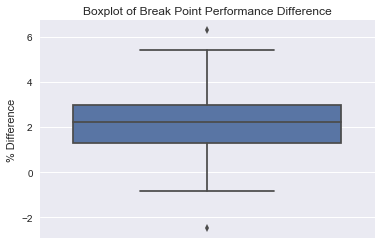

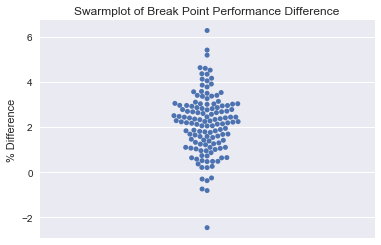

In [7]:
#Graphical EDA
#Import relevant packages
import matplotlib.pyplot as plt
import seaborn as sns

#Set Seaborn as default
sns.set()

#Boxplot
sns.boxplot(y=serve_all_df['BP_Diff_%'])
plt.title('Boxplot of Break Point Performance Difference')
plt.ylabel('% Difference')
plt.show()

#Swarmplot
sns.swarmplot(y='BP_Diff_%', data=serve_all_df)
plt.title('Swarmplot of Break Point Performance Difference')
plt.ylabel('% Difference')
plt.show()

The boxplot suggests some outliers at both extremes.  Lets take a closer look.

In [8]:
#Check the extremes
print(serve_all_df.loc[serve_all_df['BP_Diff_%'].idxmax()])
print(serve_all_df.loc[serve_all_df['BP_Diff_%'].idxmin()])

1st_Serve            0.619000
1st_Serve_Pts_Won    0.729000
2nd_Serve_Pts_Won    0.495000
Break_Pts_Saved      0.577000
Serve_Pts_Won        0.639846
BP_Diff_%            6.284600
Name: Austin Krajicek, dtype: float64
1st_Serve            0.585000
1st_Serve_Pts_Won    0.696000
2nd_Serve_Pts_Won    0.521000
Break_Pts_Saved      0.648000
Serve_Pts_Won        0.623375
BP_Diff_%           -2.462500
Name: Mirza Basic, dtype: float64


Looking at the player bios on ATP Tour shows that Krajicek has played 31 Tour level matches and Basic has played 36.  While not a huge amount of matches they aren't complete novices so I will leave them in the data set for the purposes of this analysis.

Lets now create a histogram of our data, highlighting the performances of our legends on it.

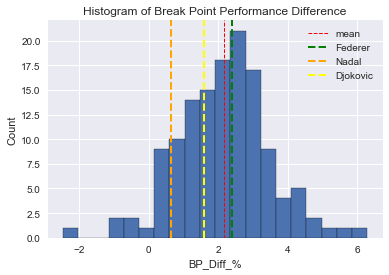

In [14]:
#Histogram
plt.hist(x='BP_Diff_%', data=serve_all_df, bins=20, edgecolor='k')
plt.title('Histogram of Break Point Performance Difference')
plt.xlabel('BP_Diff_%')
plt.ylabel('Count')
plt.axvline(serve_all_df['BP_Diff_%'].mean(), color='red', linestyle='--', linewidth=1, label='mean')
plt.axvline(serve_df.iloc[0]['BP_Diff_%'], color='green', linestyle='--', linewidth=2, label='Federer')
plt.axvline(serve_df.iloc[1]['BP_Diff_%'], color='orange', linestyle='--', linewidth=2, label='Nadal')
plt.axvline(serve_df.iloc[2]['BP_Diff_%'], color='yellow', linestyle='--', linewidth=2, label='Djokovic')
plt.legend(loc='best')
plt.show()

At a glance we can see that Federer performs worse than the Tour mean from our data set. Djokovic is better than the mean in this category and Nadal performs much better than the Tour mean.

### **Distribution of the data**

Lets look at the distribution of our data a little closer. It looks like it might be normally distributed, lets check that without the binning bias of the histogram by creating a cumulative distribution function plot.

Firstly I'll define a function for creating our ECDF output, then using the mean and standard deviation of our BP Diff % tour-wide sample I'll create many samples to replicate how a normal distribution should look if our sample was normally distributed. Then I'll overlay our theoretical normal distribution over our actual data on a plot.

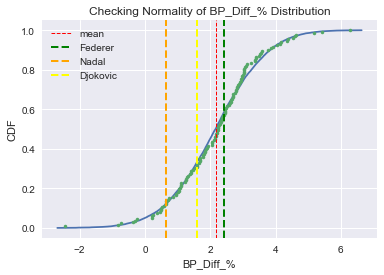

In [10]:
#Define our ECDF function
def ecdf(data):
    """Compute ECDF for a 1D array of measurements"""
    #Compute number of data points:n
    n = len(data)
    #x-data for the ECDF:x
    x = np.sort(data)
    #y-data for the ECDF:y
    y = np.arange(1, n+1)/n
    return x, y

#Checking normality of the serve data
mean = np.mean(serve_all_df['BP_Diff_%'])
std = np.std(serve_all_df['BP_Diff_%'])

samples = np.random.normal(mean, std, size=10000)

#Using our ECDF function
x_atp_all, y_atp_all = ecdf(serve_all_df['BP_Diff_%'])
x_theor, y_theor = ecdf(samples)

#Plot the ECDF
plt.plot(x_theor, y_theor)
plt.plot(x_atp_all, y_atp_all, marker='.', linestyle='none')
plt.xlabel('BP_Diff_%')
plt.ylabel('CDF')
plt.title('Checking Normality of BP_Diff_% Distribution')
plt.axvline(serve_all_df['BP_Diff_%'].mean(), color='red', linestyle='--', linewidth=1, label='mean')
plt.axvline(serve_df.iloc[0]['BP_Diff_%'], color='green', linestyle='--', linewidth=2, label='Federer')
plt.axvline(serve_df.iloc[1]['BP_Diff_%'], color='orange', linestyle='--', linewidth=2, label='Nadal')
plt.axvline(serve_df.iloc[2]['BP_Diff_%'], color='yellow', linestyle='--', linewidth=2, label='Djokovic')
plt.legend(loc='best')
plt.show()


Our data certainly seems to be approximately normally distributed, with the ECDF of our data overlaying very closely the theoretical CDF. 

### **Legends Performance**

Lets see exactly where our legends fall on the distribution.

In [12]:
#Checking the chances of being better than our legends.  Using our samples data from earlier.
prob_rafa = np.sum(samples <= 0.647) / len(samples)
print('Probability of being better than Rafa =', prob_rafa)

prob_djoko = np.sum(samples <= 1.582) / len(samples)
print('Probability of being better than Djoko =', prob_djoko)

prob_fed = np.sum(samples <= 2.410) / len(samples)
print('Probability of being better than Federer =', prob_fed)

prob_no_change = np.sum(samples <= 0) / len(samples)
print('Probability of being better than normal level =', prob_no_change)

Probability of being better than Rafa = 0.122
Probability of being better than Djoko = 0.3298
Probability of being better than Federer = 0.5827
Probability of being better than normal = 0.0507


We can see that these values correspond to the CDF plot.  So only 12% of tour players would be better than Rafa at this metric, meanwhile 58% of tour players would be better than Federer. 

We can also see that only 5% of players perform better trying to save break points than they do normally and this might be an overestimation as we have an outlier (Mirza Basic) who may trend back to the mean as he plays more matches.  Lets quickly check who the other players were in our sample using boolean selection out of our DataFrame.


In [13]:
print(serve_all_df.loc[serve_all_df['BP_Diff_%'] <= 0])

                    1st_Serve  1st_Serve_Pts_Won  2nd_Serve_Pts_Won  \
Jan Siemerink           0.563              0.749              0.507   
Joachim Johansson       0.621              0.792              0.528   
Lukas Rosol             0.579              0.724              0.497   
Mirza Basic             0.585              0.696              0.521   
Steve Johnson           0.594              0.752              0.525   
Thanasi Kokkinakis      0.586              0.748              0.486   

                    Break_Pts_Saved  Serve_Pts_Won  BP_Diff_%  
Jan Siemerink                 0.647       0.643246    -0.3754  
Joachim Johansson             0.695       0.691944    -0.3056  
Lukas Rosol                   0.631       0.628433    -0.2567  
Mirza Basic                   0.648       0.623375    -2.4625  
Steve Johnson                 0.668       0.659838    -0.8162  
Thanasi Kokkinakis            0.647       0.639532    -0.7468  


Checking the player bios on ATP Tour for these players we can see that Kokkinakis is early in his career and has played 46 matches, the others are experienced players and all have played well over a hundred, if not hundreds, of tour level matches so their stats can be deemed reliable.

Note: these are not likely to be the only players who have performed better on break points against them than usual, they are just the only players in my sample of 133 random tour players past and present who meet the criteria. The original CSV file is available on my Github (see the link in the code for 'Creating a DataFrame from a CSV File' above) if you're interested in seeing all the players in the sample. 


### **Conclusion**

This analysis provided a surprising result, I expected to find that three of the greatest players ever would 'up their game' on crucial points (in this case their performance saving break points compared to their normal performance on serve).  Instead I found that they got worse, showing even the greats are susceptible to tightening up in tense situations.

That lead to looking at a random sample of ATP Tour players past and present. It shows that:

    - ATP Tour players on average play 2.16% worse than they usually would when facing a break point against their serve
    - Djokovic performs better than the Tour mean in this situation
    - Nadal performs a lot better than the Tour mean, only 12% of Tour players are better than him at this metric
    - Federer surprisingly performs worse than the Tour mean when facing break points against him
    - It is possible to play better than normal in this stress situation, about 5% of ATP Tour players manage it


### **Final Thoughts**

I have to ask myself why I thought the legends would be able to up their game in stress situations? My suspicion is that I fell into the conventional wisdom trap. Watching these players play in so many high profile epic matches lead me to think that they improved their game in these moments, as they would invariably end up winning the match. 

Instead, unsurprisingly its more likely their extremely high base level that gets them through matches, not being better in crucial moments specifically.  For example, even after tightening up Federer wins 67.1% of break points against him, thats still a higher rate than Djokovic wins a serve point generally (66.98%).

Also (assuming Mirza Basic trends back to the Tour mean) lets tip our hat to Steve Johnson, a player who over the course of hundreds of matches consistently does manage to up his game in stress moments (by 0.816%). As we've shown, its a rare talent to possess!
